In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [84]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:]

In [90]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [92]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2836, 50), (2836, 1), (354, 50), (354, 1), (355, 50), (355, 1))

## Feature selection

Feature ranking:
1. feature Clean sheets (0.040)
2. feature Assists (0.038)
3. feature Big Chances Created (0.030)
4. feature Passes (0.028)
5. feature Goals (0.027)
6. feature Blocked shots (0.027)
7. feature Goals Conceded (0.024)
8. feature Goals with right foot (0.023)
9. feature Shots on target (0.022)
10. feature Hit woodwork (0.021)
11. feature Goals with left foot (0.021)
12. feature Clearances off line (0.021)
13. feature Big chances missed (0.020)
14. feature Own goals (0.020)
15. feature Penalties scored (0.020)
16. feature Cross accuracy % (0.019)
17. feature Sweeper clearances (0.019)
18. feature Tackle success % (0.019)
19. feature Passes per match (0.019)
20. feature Shots (0.019)
21. feature Accurate long balls (0.019)
22. feature Crosses (0.019)
23. feature Headed goals (0.019)
24. feature Red cards (0.019)
25. feature Offsides (0.019)
26. feature Through balls (0.018)
27. feature Freekicks scored (0.018)
28. feature Goals per match (0.018)
29. feature Tackles (0.018)


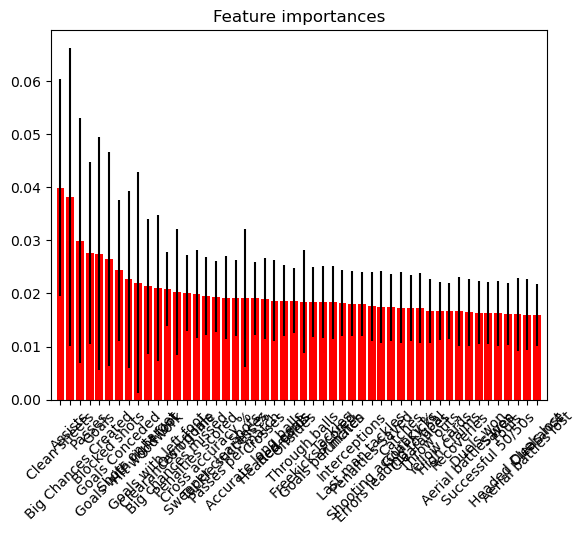

In [93]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train.values.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()